# Tutorial 2: Terrain Attributes from DEM

Today we will be calculating terrain attributes from a DEM. Terrain attributes are derived from the elevation data in a DEM and provide insights into the landscape's shape, slope, and other characteristics. We will use a python library called `xdem` to calculate these attributes.

xdem is a new and powerful library for performing quantiative analysis on elevation data. It was designed explicity by glaciologists tracking changes in glaciers and ice sheets from repeat elevation data. However, it has many functions that are useful for general DEM analysis.

other libraries we will use include `rasterio` for reading and writing raster data, and `matplotlib` for visualizing the results.


In [2]:
# This chunk imports the required libraries
import matplotlib.pyplot as plt
import xdem
from rasterio.enums import Resampling

In [3]:
# if you completed tutorial 1, then the dem below is already downloaded and clipped to the study area. 

dem = xdem.DEM("data/derived/study_area_dem_clipped.tif") # load the DEM as an xdem object
dem_utm = dem.reproject( # ensure the data is properly projected
    crs="EPSG:32612",                       # meters per pixel (pick what you want)
    resampling=Resampling.bilinear
)


### **Exercise 1:** load and plot the dem using xdem's built-in plotting function. Apply colormap "terrain" 

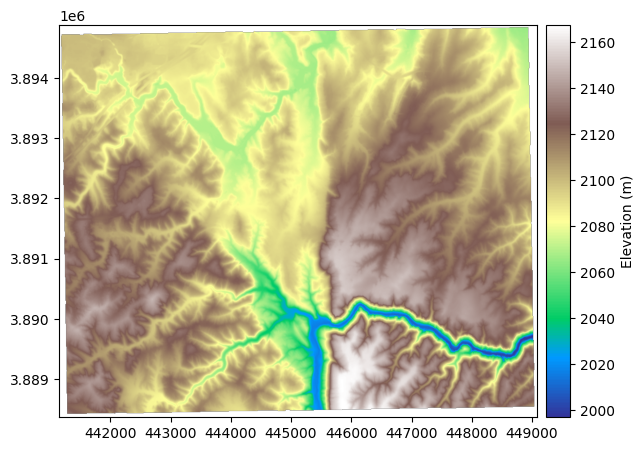

In [4]:
dem_utm.plot(cmap=  "terrain", cbar_title="Elevation (m)")

### **Exercise 2:** Calculate slope and aspect using xdem's built-in functions. 

> Plot the results using matplotlib. Use colormap "viridis" for slope and "hsv" for aspect.

The slope of a DEM describes the tilt, or gradient, of each pixel in relation to its neighbours. It is most often described in degrees, where a flat surface is 0° and a vertical cliff is 90°. No tilt direction is stored in the slope map; a 45° tilt westward is identical to a 45° tilt eastward.

The slope 
can be computed either by the method of Horn (1981) (default) based on a refined gradient formulation on a 3x3 pixel window, or by the method of Zevenbergen and Thorne (1987) based on a plane fit on a 3x3 pixel window.

> For more info see the docs for xdem slope [here](https://xdem.readthedocs.io/en/stable/terrain.html#slope)

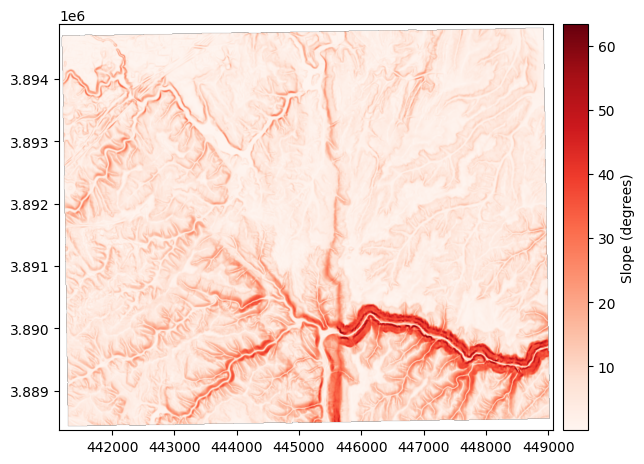

In [5]:
slope = dem_utm.slope()
slope.plot(cmap="Reds", cbar_title="Slope (degrees)")

### **Exercise 3:** Calculate aspect using xdem's built-in function.


The **aspect** describes the orientation of strongest slope. It is often reported in degrees, where a slope tilting straight north corresponds to an aspect of 0°, and an eastern aspect is 90°, south is 180° and west is 270°. By default, a flat slope is given an arbitrary aspect of 180°.

The aspect 
 is based on the same variables as the slope, and thus varies similarly between the method of Horn (1981) (default) and that of Zevenbergen and Thorne (1987):
$$
 \theta = \arctan\left( \frac{p}{q} \right)
$$
 With $p$ and $q$ defined in the slope section. 

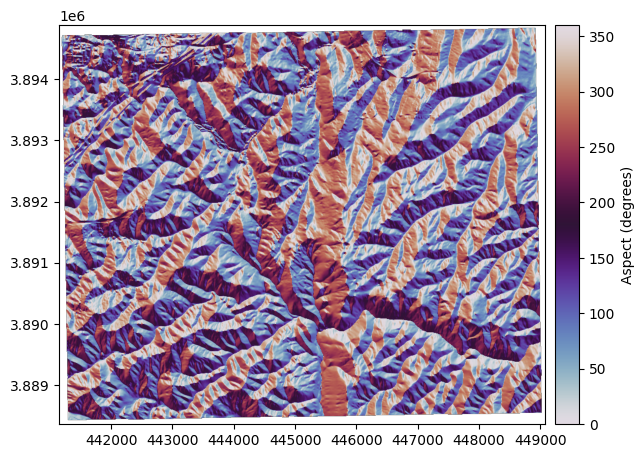

In [6]:
aspect = dem_utm.aspect()
aspect.plot(cmap="twilight", cbar_title="Aspect (degrees)")

### **Exercise 4**: Create a hillshade using xdem's built-in function.

The hillshade is a slope map, shaded by the aspect of the slope. With a westerly azimuth (a simulated sun coming from the west), all eastern slopes are slightly darker. This mode of shading the slopes often generates a map that is much more easily interpreted than the slope.

The hillshade $hs$ is directly based on the slope $\alpha$ and aspect $\theta$ and also varies betwen the method of Horn (1981) and that of Zevenbergen and Thorne (1987), and is often scaled between 1 and 255:



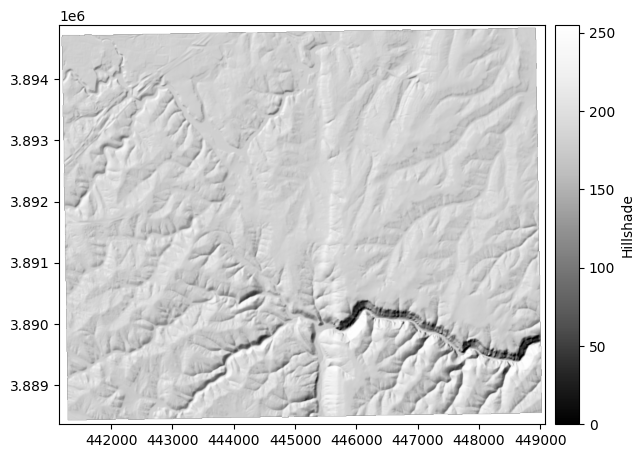

In [15]:
hillshade = dem_utm.hillshade()
hillshade.plot(cmap="Grays_r", cbar_title="Hillshade")

### **Exercise 5:** Caculate curvature 3 ways using xdem's built-in function.

The curvature (standard) is the second derivative of elevation, which highlights the convexity or concavity of the terrain. If a surface is convex (like a mountain peak), it will have positive curvature. If a surface is concave (like a through or a valley bottom), it will have negative curvature. The curvature values in units of m-1 are quite small, so they are by convention multiplied by 100.

The curvature $c$ is based on the method of Zevenbergen and Thorne (1987) expanded to compute the surface laplacian in Moore et al. (1991).

$$
c = -100\frac{\left( h_{+0}+h_{-0}+h_{0+}+h_{0-}\right)-4h_{00}}{\Delta x \Delta y}
$$


![Standard Curvature](https://pro.arcgis.com/en/pro-app/3.3/help/analysis/raster-functions/GUID-E97C164E-23D8-4D2F-AB06-49EE37912E26-web.png)

The **planform curvature** is the curvature perpendicular to the direction of slope, reported in 100 m-1, also based on Zevenbergen and Thorne (1987)

![planform curvature](https://pro.arcgis.com/en/pro-app/3.3/help/analysis/raster-functions/GUID-62749E70-2EAA-409B-A070-79C3D72BD620-web.png)

The **profile curvature** is the curvature parallel to the direction of slope, reported in 100 m-1, also based on Zevenbergen and Thorne (1987):

![profile curvature](https://pro.arcgis.com/en/pro-app/3.3/help/analysis/raster-functions/GUID-A9037CB0-FFBE-48E9-B7DD-F3224F1AA151-web.png)



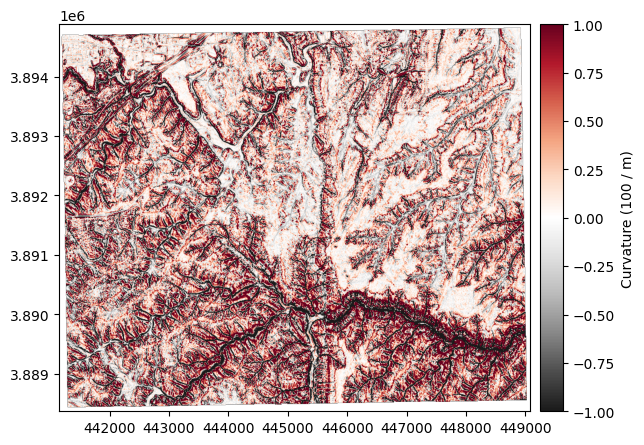

In [16]:
curvature = dem_utm.curvature()
curvature.plot(cmap="RdGy_r", cbar_title="Curvature (100 / m)", vmin=-1, vmax=1, interpolation="antialiased")

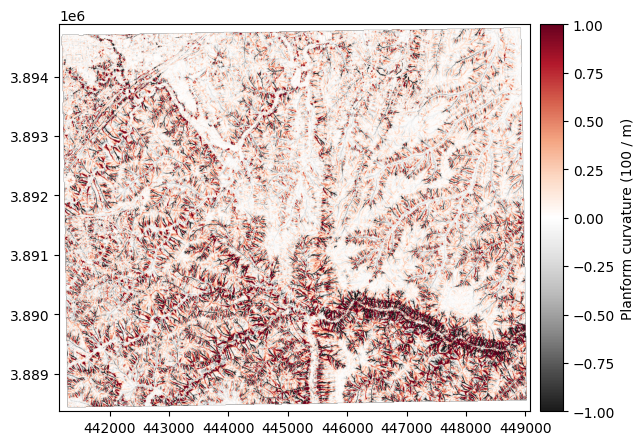

In [17]:
planform_curvature = dem_utm.planform_curvature()
planform_curvature.plot(cmap="RdGy_r", cbar_title="Planform curvature (100 / m)", vmin=-1, vmax=1, interpolation="antialiased")

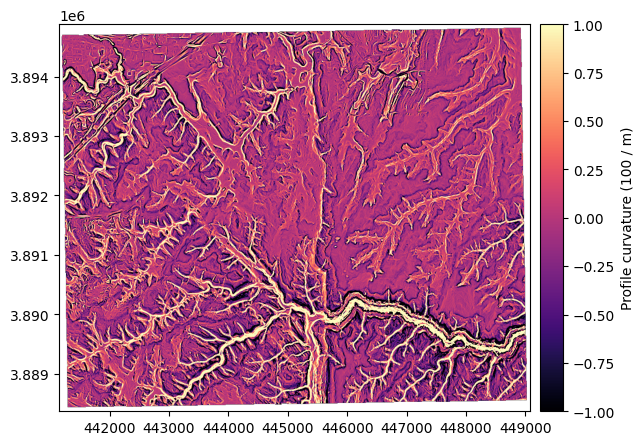

In [14]:
profile_curvature = dem_utm.profile_curvature()
profile_curvature.plot(cmap="magma", cbar_title="Profile curvature (100 / m)", vmin=-1, vmax=1, interpolation="antialiased")

## **Exercise 6:**  Calculate Topographic Position Index (TPI) using xdem's built-in function.


The topographic position index (TPI) is a metric of slope position, described in Weiss (2001), that corresponds to the difference of the elevation of a central pixel with the average of that of neighbouring pixels. Its unit is that of the DEM (typically meters) and it can be computed for any window size (default 3x3 pixels).

We will use a window size of 15x15 pixels to capture larger scale topographic features.

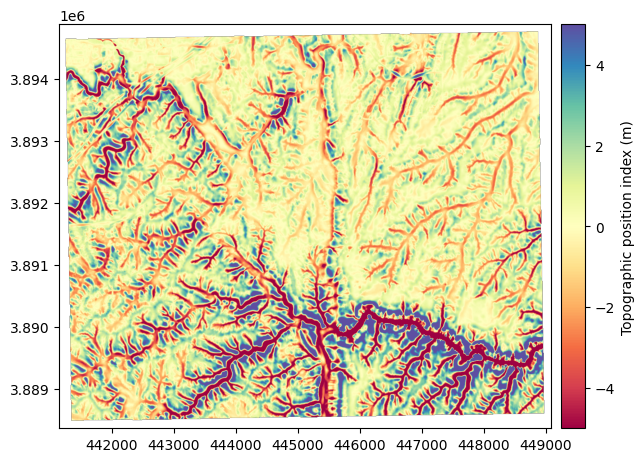

In [23]:
tpi = dem_utm.topographic_position_index(window_size=15)
tpi.plot(cmap="Spectral", cbar_title="Topographic position index (m)", vmin=-5, vmax=5)

## **Exercise 7:** Calculate the terrain ruggedness index (TRI) using xdem's built-in function.

The terrain ruggedness index (TRI) is a metric of terrain ruggedness, based on cumulated differences in elevation between a central pixel and its surroundings. Its unit is that of the DEM (typically meters) and it can be computed for any window size (default 3x3 pixels).

For topography (default), the method of Riley et al. (1999) is generally used, where the TRI is computed by the squareroot of squared differences with neighbouring pixels

for bathymetry, the method of Wilson et al. (2007) is generally used, where the TRI is defined by the mean absolute difference with neighbouring pixels

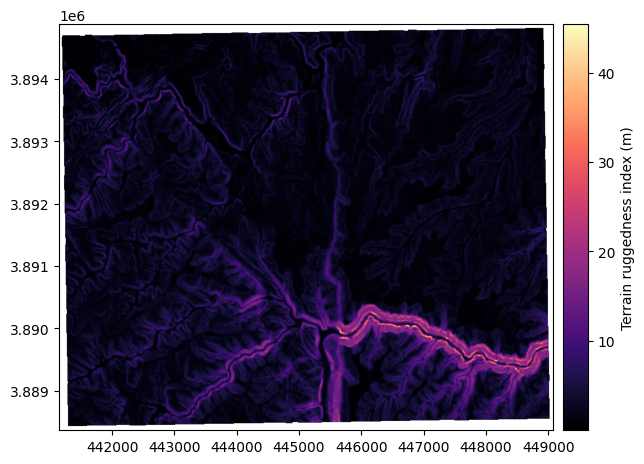

In [12]:
tri = dem_utm.terrain_ruggedness_index(window_size=3)
tri.plot(cmap="magma", cbar_title="Terrain ruggedness index (m)")

## **Exercsise 8:** Calculate the fractal roughness using xdem's built-in function.

The fractal roughness is a metric of terrain ruggedness based on the local fractal dimension estimated by the volume box-counting method of Taud and Parrot (2005). The fractal roughness is computed by estimating the fractal dimension in 3D space, for a local window centered on the DEM pixels. Its unit is that of a dimension, and is always between 1 (dimension of a line in 3D space) and 3 (dimension of a cube in 3D space). It can only be computed on window sizes larger than 5x5 pixels, and defaults to 13x13.

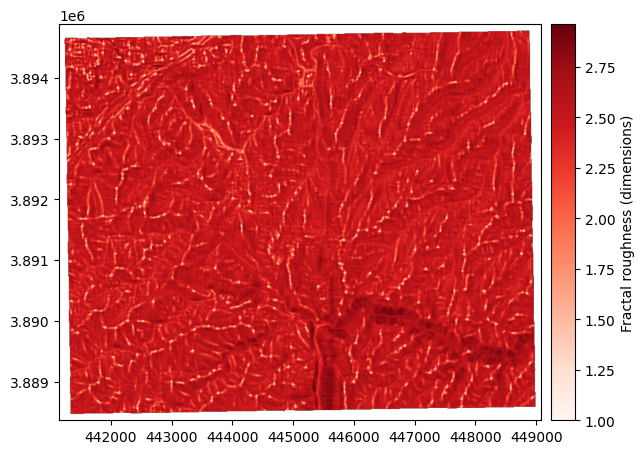

In [13]:
fractal_roughness = dem_utm.fractal_roughness()
fractal_roughness.plot(cmap="Reds", cbar_title="Fractal roughness (dimensions)")